# INDEX FUNDS vs TECH STOCKS

In this notebook we will be looking at data from the stock market, particularly some technology stocks and INDEX funds(S&P 500). We use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock and test the general notion of INDEX funds being comparitively the safer option for investors, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method.

## Exploratory Data Analysis

The steps for EDA will be

- What was the change in price of the stock over time?
- What was the daily return of the stock on average?
- What was the moving average of the various stocks?
- What was the correlation between different stocks'?
- How much value do we put at risk by investing in a particular stock?
- How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
   

# What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime
plt.clf()

<Figure size 432x288 with 0 Axes>

In [3]:
# The tech stocks and INDEX fund we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','FB','INDEX']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [4]:
#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [5]:
company_list = [AAPL, GOOG, MSFT, AMZN, FB, INDEX]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "Facebook","INDEX"]

In [6]:
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

In [7]:
df = pd.concat(company_list, axis=0)

In [8]:
df

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-10-26,116.550003,112.879997,114.010002,115.050003,111850700.0,114.314751,APPLE
2020-10-27,117.279999,114.540001,115.489998,116.599998,92276800.0,115.854843,APPLE
2020-10-28,115.430000,111.099998,115.050003,111.199997,143937800.0,110.489349,APPLE
2020-10-29,116.930000,112.199997,112.370003,115.320000,146129200.0,114.583015,APPLE
2020-10-30,111.989998,107.720001,111.059998,108.860001,190272600.0,108.164307,APPLE
...,...,...,...,...,...,...,...
2021-10-18,47.150002,47.150002,47.150002,47.150002,0.0,47.150002,INDEX
2021-10-19,47.419998,47.419998,47.419998,47.419998,0.0,47.419998,INDEX
2021-10-20,47.790001,47.790001,47.790001,47.790001,0.0,47.790001,INDEX


### Let us look at the Apple stock dataset for a general insight

In [9]:
AAPL

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-10-26,116.550003,112.879997,114.010002,115.050003,111850700.0,114.314751,APPLE
2020-10-27,117.279999,114.540001,115.489998,116.599998,92276800.0,115.854843,APPLE
2020-10-28,115.430000,111.099998,115.050003,111.199997,143937800.0,110.489349,APPLE
2020-10-29,116.930000,112.199997,112.370003,115.320000,146129200.0,114.583015,APPLE
2020-10-30,111.989998,107.720001,111.059998,108.860001,190272600.0,108.164307,APPLE
...,...,...,...,...,...,...,...
2021-10-18,146.839996,143.160004,143.449997,146.550003,85589200.0,146.550003,APPLE
2021-10-19,149.169998,146.550003,147.009995,148.759995,76378900.0,148.759995,APPLE
2021-10-20,149.750000,148.119995,148.699997,149.259995,58418800.0,149.259995,APPLE


In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,134.504144,131.741075,133.139204,133.173506,9.327500e+07,132.850115
std,10.910464,11.012776,10.977201,10.999639,2.944803e+07,11.158701
min,110.680000,107.320000,109.110001,108.769997,4.639770e+07,108.074883
25%,125.904999,122.965000,124.355000,124.805000,7.332545e+07,124.583344
50%,133.559998,130.630005,132.130005,131.970001,8.810510e+07,131.432465
75%,144.779999,142.284996,143.500000,143.264999,1.085676e+08,143.157852
max,157.259995,154.389999,156.979996,156.690002,1.925415e+08,156.690002


In [11]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-10-26 to 2021-10-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          251 non-null    float64
 1   Low           251 non-null    float64
 2   Open          251 non-null    float64
 3   Close         251 non-null    float64
 4   Volume        251 non-null    float64
 5   Adj Close     251 non-null    float64
 6   company_name  251 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.7+ KB


##### Let's see a historical view of the closing price

In [12]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

<Figure size 1080x432 with 0 Axes>

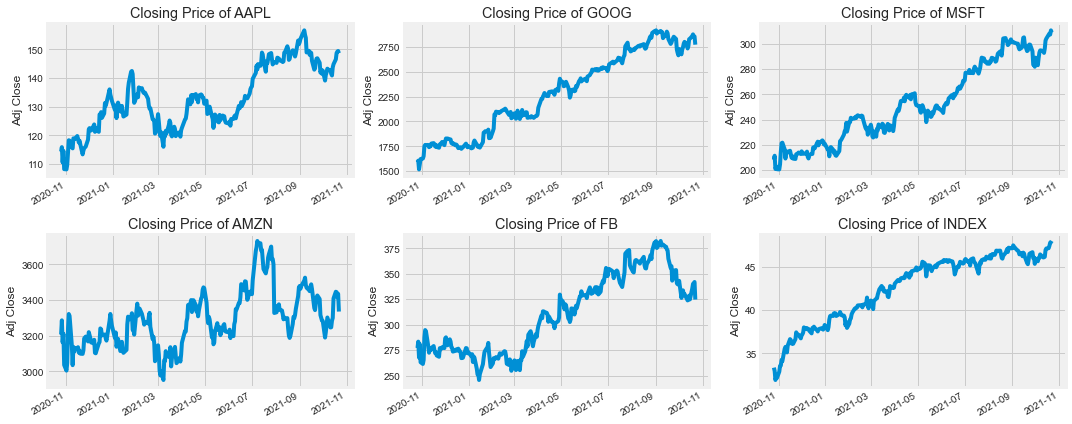

In [13]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## What was the moving average of the various stocks?

In statistics, a moving average is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean or rolling mean and is a type of finite impulse response filter.

In [14]:
ma_day = [10, 20, 50] #Noumber of days

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

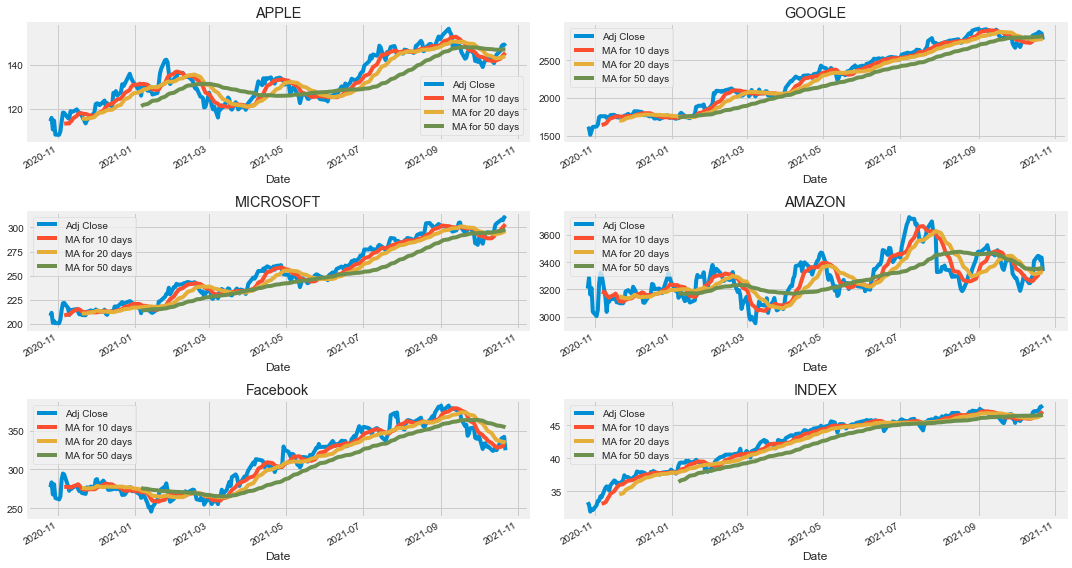

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

FB[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Facebook')

INDEX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('INDEX')
fig.tight_layout()

## What was the daily return of the stock on average?

We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the stocks.

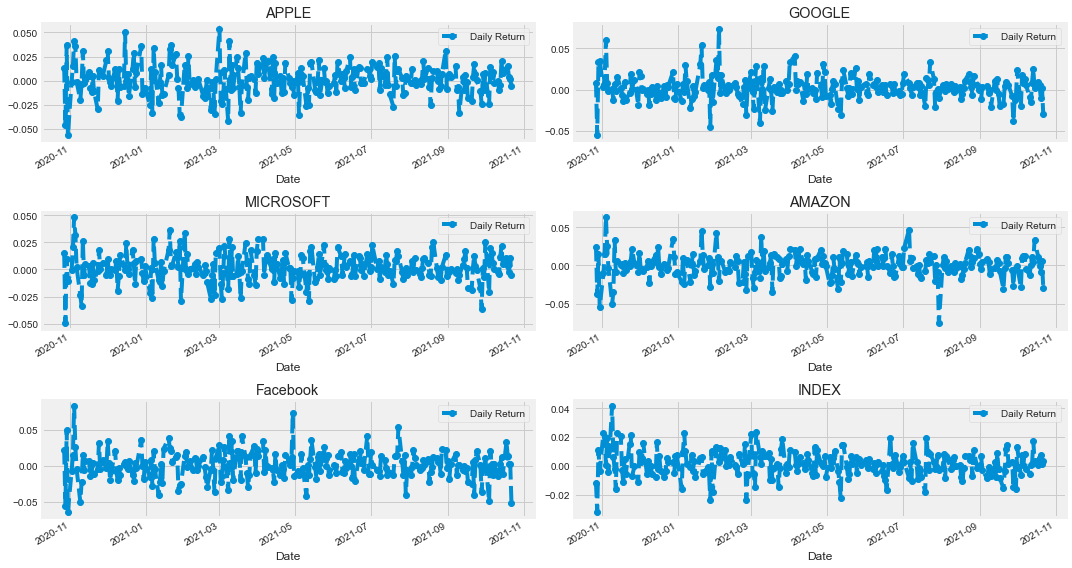

In [16]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

FB['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('Facebook')

INDEX['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('INDEX')

fig.tight_layout()

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

C:\Users\insan\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\insan\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\insan\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

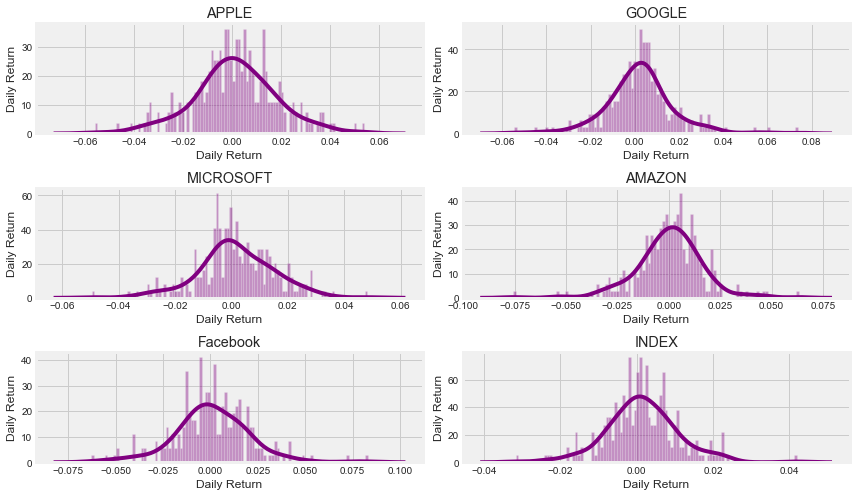

In [17]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

## What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [18]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN,FB,INDEX
Date,,,,,,
2020-10-26,114.314743,1590.449951,208.169830,3207.040039,277.109985,33.332230
2020-10-27,115.854843,1604.260010,211.311005,3286.330078,283.290009,32.948196
2020-10-28,110.489349,1516.619995,200.837112,3162.780029,267.670013,31.904411
2020-10-29,114.583015,1567.239990,202.858566,3211.010010,280.829987,32.249058
2020-10-30,108.164307,1621.010010,200.629028,3036.149902,263.109985,32.140739


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks.

In [19]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,FB,INDEX
Date,,,,,,
2020-10-26,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-27,0.013472,0.008683,0.015089,0.024724,0.022302,-0.011521
2020-10-28,-0.046312,-0.054630,-0.049566,-0.037595,-0.055138,-0.031680
2020-10-29,0.037050,0.033377,0.010065,0.015249,0.049165,0.010802
2020-10-30,-0.056018,0.034309,-0.010991,-0.054456,-0.063099,-0.003359


C:\Users\insan\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


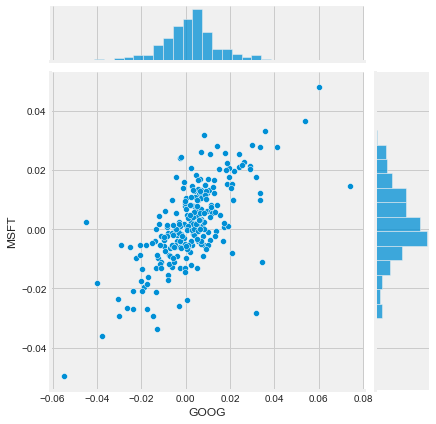

In [20]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

C:\Users\insan\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


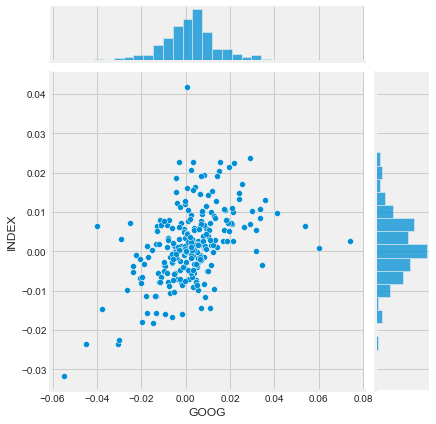

In [21]:
# We'll use joinplot to compare the daily returns of Google and INDEX
sns.jointplot('GOOG', 'INDEX', tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

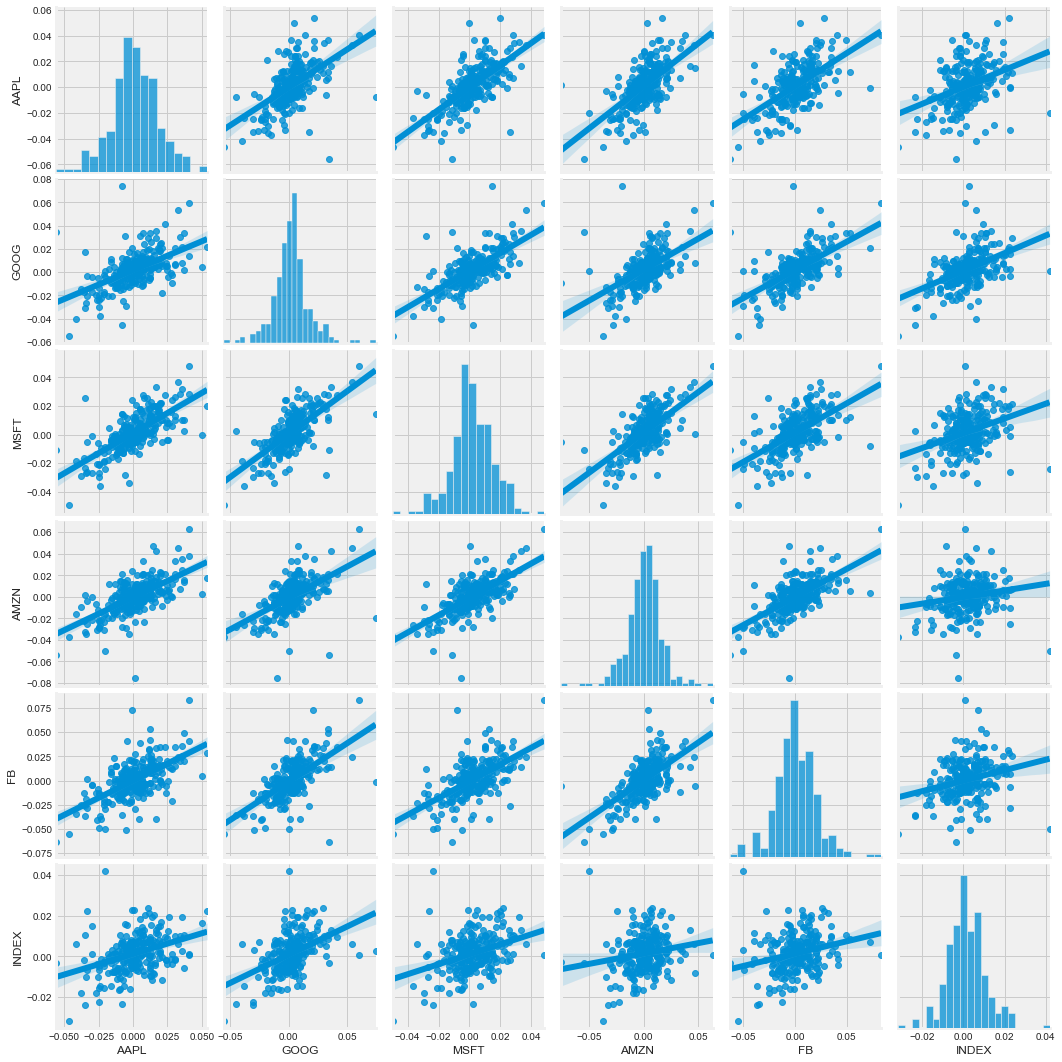

In [22]:
sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

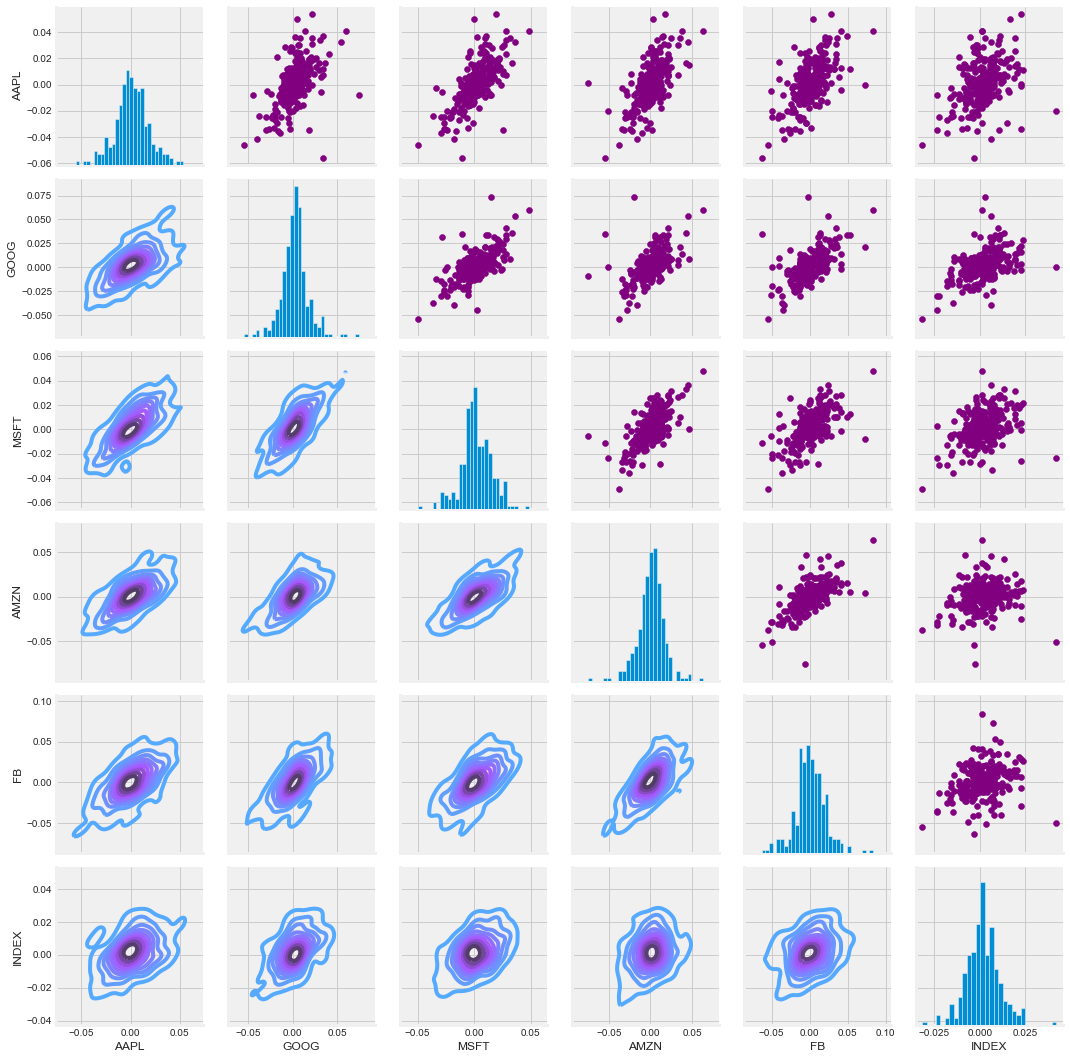

In [23]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

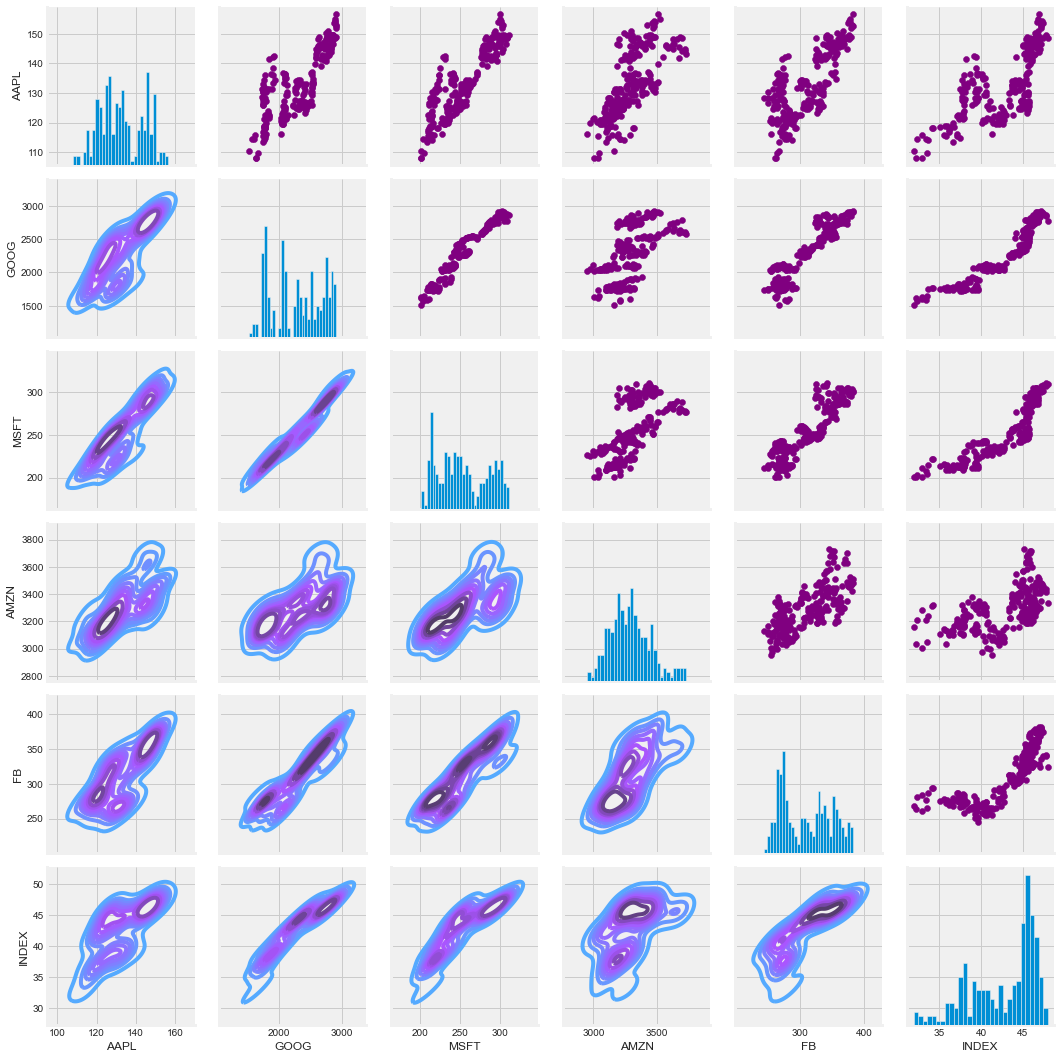

In [24]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

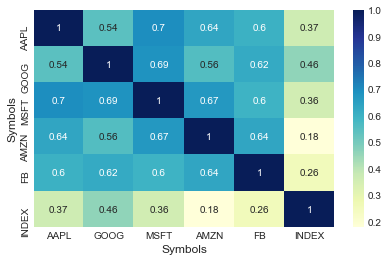

In [37]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='YlGnBu')

Here the minimal corelation between the Index Funds and Tech Stocks is clearly visible.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

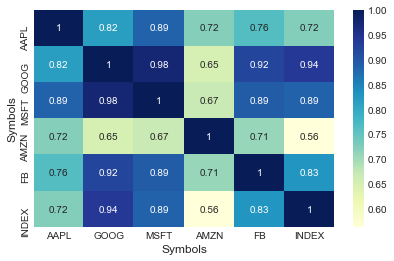

In [38]:
sns.heatmap(closing_df.corr(), annot=True, cmap='YlGnBu')

Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

## How much value do we put at risk by investing in a particular stock?

One of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

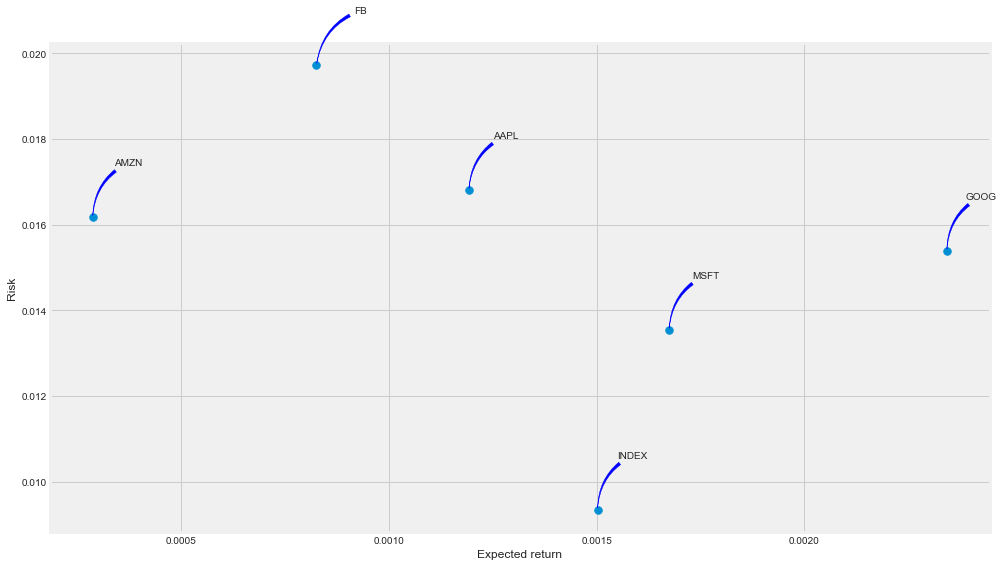

In [27]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(15, 9))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='wedge', color='blue', connectionstyle='arc3,rad=+0.3'))

Here we can see that 
- INDEX funds hold up to the general perception of being minimal risk and of abive average Expected return. 


- While Amazon, Apple and Facebook are found to be of the highest risk, Microsoft tends to have an average risk and above average returns. 


- Google is seen to have the highest expected return while of being an average risk.

# Predicting the closing stock price of Google:

Let's try to predict the closing price of Google. Using LSTM

In [28]:
# Get the stock quote
df = DataReader('GOOG', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,332.827484,324.966949,325.250885,331.462585,7380561.0,331.462585
2012-01-04,333.873566,329.076538,331.273315,332.892242,5749470.0,332.892242
2012-01-05,330.745270,326.889740,329.828735,328.274536,6590410.0,328.274536
2012-01-06,328.767700,323.681763,328.344299,323.796326,5405987.0,323.796326
2012-01-09,322.291962,309.455078,322.042908,310.067780,11688849.0,310.067780
...,...,...,...,...,...,...
2021-10-18,2859.975098,2824.270020,2824.270020,2859.209961,828200.0,2859.209961
2021-10-19,2882.139893,2861.919922,2865.830078,2876.439941,765800.0,2876.439941
2021-10-20,2884.955078,2838.239990,2884.449951,2848.300049,897000.0,2848.300049


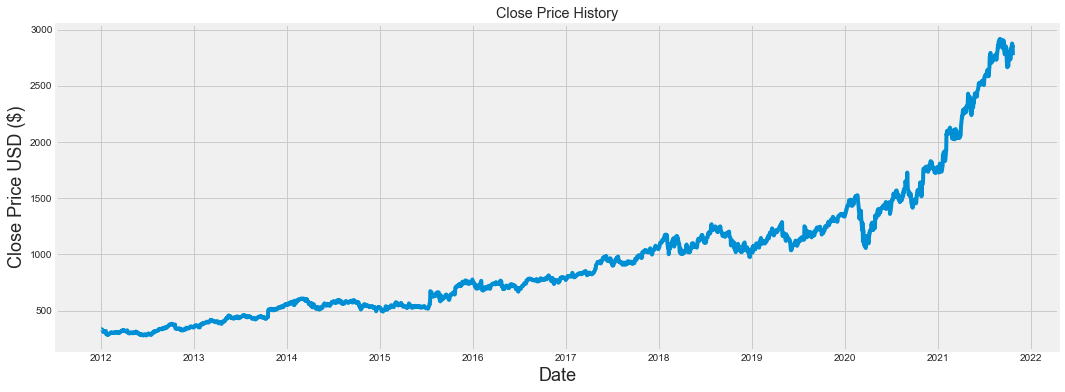

In [29]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [30]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2346

In [31]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0200812 ],
       [0.02062307],
       [0.01887286],
       ...,
       [0.97402172],
       [0.9767924 ],
       [0.94529172]])

In [32]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0200812 , 0.02062307, 0.01887286, 0.01717551, 0.01197207,
       0.01210046, 0.01263288, 0.01332768, 0.01244974, 0.01312755,
       0.01394508, 0.01520251, 0.00508638, 0.00499764, 0.00413104,
       0.00197112, 0.00170868, 0.00395167, 0.00351932, 0.00397622,
       0.00411215, 0.00492024, 0.00703862, 0.00944776, 0.00900973,
       0.00959126, 0.00989522, 0.00884737, 0.01003494, 0.00957426,
       0.00878129, 0.00896254, 0.00860759, 0.01037478, 0.00923064,
       0.00888512, 0.00960069, 0.00948929, 0.01120363, 0.0111772 ,
       0.01196074, 0.01174362, 0.01042199, 0.008668  , 0.0090154 ,
       0.0090796 , 0.00777874, 0.00870387, 0.01108847, 0.01075051,
       0.01172096, 0.01245918, 0.01414709, 0.01405458, 0.01527992,
       0.01642596, 0.0157727 , 0.01704523, 0.0166091 , 0.01825924])]
[0.016871530550816513]

[array([0.0200812 , 0.02062307, 0.01887286, 0.01717551, 0.01197207,
       0.01210046, 0.01263288, 0.01332768, 0.01244974, 0.01312755,
       0.01394508, 0.01520251, 0.0

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2286/2286 [==============================] - 60s 24ms/step - loss: 5.3436e-04


In [34]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

70.43387060522342

<ipython-input-35-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


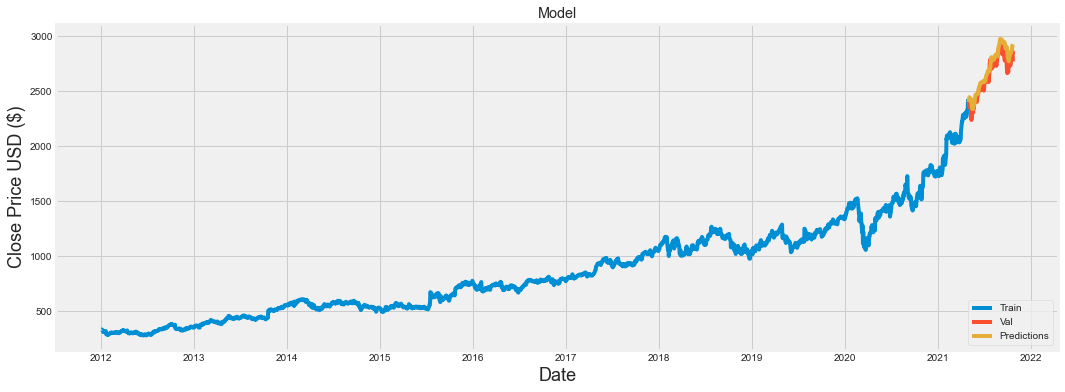

In [35]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [36]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-04-30,2410.120117,2402.450684
2021-05-03,2395.169922,2429.571289
2021-05-04,2354.250000,2446.045654
2021-05-05,2356.739990,2445.248779
2021-05-06,2381.350098,2436.640869
...,...,...
2021-10-18,2859.209961,2872.752686
2021-10-19,2876.439941,2891.819580
2021-10-20,2848.300049,2912.658447


## Conclusion

- Visualization of the closing prices, moving average and daily stock returns were done.


- While the tech stocks themselves have corelation between their attributes, such as Microsoft and Amazon on daily stock returns. INDEX fund seems to be quite independent of the tech stocks inspite having certain percentage of these stocks in it.


- The risk factor of investing in each of the stocks were calculated and visualized against expected returns. INDEX fund was found to hold up to the reputaion of having a significantly lower risk and have an above average expected return in comparison to the popular tech stocks.


- Using the LSTM method we were able to succesfully predict the closing prices of google stocks.